In [6]:
import h5py as hdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import glob 
import seaborn as sns
import os
#import pyhdf
import netCDF4 as cdf
#from pyhdf.SD import SD, SDC
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
from mpl_toolkits import axes_grid1

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

In [3]:
topo                = pd.read_csv('SRTM_RAMP2_TOPO_2000-02-11_rgb_3600x1800.SS.CSV','r',delimiter=',')
topo                = topo.ix[:, topo.columns != 'lat/lon']
topo_mask           = np.ma.masked_equal(np.array(topo), 99999)
albedo_2011_07      = pd.read_csv('MCD43C3_M_BSA_2011-07-01_rgb_720x360.SS.CSV','r',delimiter=',')
albedo              = albedo_2011_07.ix[:, albedo_2011_07.columns != 'lat/lon']
columns             = range(720)
albedo.columns      = columns

done reading csv files.... making plot


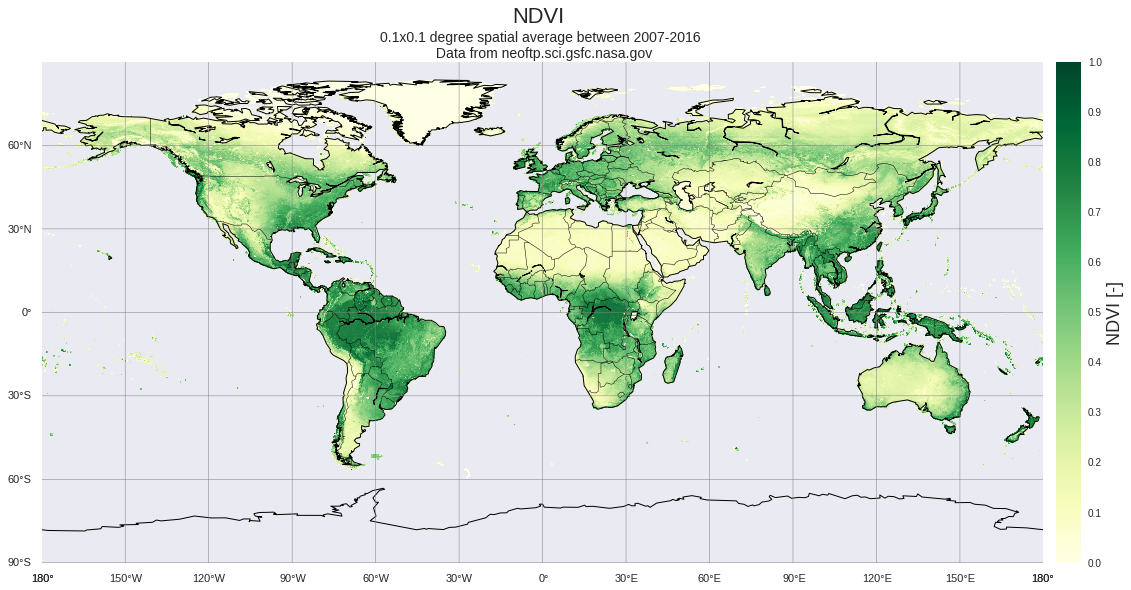

In [4]:
path = '/usr/people/botiabo/botiabo/data_download/*.CSV'
flist = glob.glob(path)
ndvi_month_all = np.zeros((len(flist),1800,3600),float)

for i in range(len(flist)):
    ndvi_month = np.array(pd.read_csv(flist[i],'r',delimiter=',',header=None))
    ndvi_month = np.ma.masked_equal(ndvi_month, 99999)
    #print flist[i]
    ndvi_month_all[i] = ndvi_month
    
print 'done reading csv files.... making plot'

ndvi_2007_2016avg = np.mean(np.ma.masked_equal(ndvi_month_all,99999),axis=0)
xx, yy            = np.meshgrid(np.arange(-180,180,0.1),np.arange(-90,90,0.1))
map               = Basemap(projection='cyl', lat_0=0, lon_0=0)

fig               = plt.figure(1,figsize=(15,15))
ax                = fig.add_subplot(211)
imm               = map.pcolormesh(xx,yy,ndvi_2007_2016avg[::-1,:],cmap='YlGn') # GnBU,Jet,coolwarm
cb                = add_colorbar(imm)

imm.set_clim(vmin=0, vmax=1)
fig.suptitle('NDVI',x=0.47,y=1.01,fontsize=22)
ax.set_title('0.1x0.1 degree spatial average between 2007-2016 \n Data from neoftp.sci.gsfc.nasa.gov',fontsize=14)
cb.set_label('NDVI [-]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
#map.bluemarble()
fig.tight_layout()
plt.show()

In [8]:
#level3_2009_k  = '/usr/people/kooreman/nobackup/data_SIFTER/M02/SIFTER2/Level3/2009/SIFTER2_M02_L3_01_2009.nc'
l3             = '/usr/people/kooreman/nobackup_1/data_SIFTER/M02/SIFTER2/Level3/2009/SIFTER2_M02_L3_08_2009.nc'

data_k         = cdf.Dataset(l3)#level3_2009_k
fs_2009_01_k   = np.ma.masked_invalid(data_k.variables['Chl_F_monthly'][:]*1000)
fs_2009_01v2_k = np.ma.masked_invalid(data_k.variables['Chl_F_monthly_v2'][:]*1000)

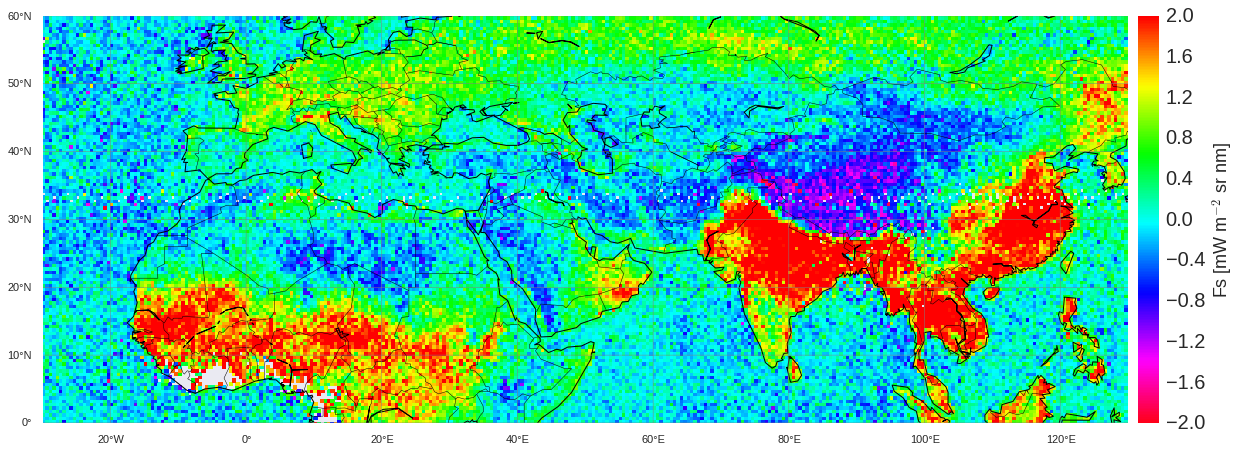

In [19]:
lllat    = 0
urlat    = 60
lllon    = -30
uprlon   = 130

xx, yy   = np.meshgrid(np.arange(-180,180,0.5),np.arange(-90,90,0.5))
fig      = plt.figure(1,figsize=(20,20))
ax       = fig.add_subplot(111)
map     = Basemap(projection='cyl',llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=uprlon)
#map      = Basemap(projection='cyl', lat_0=0, lon_0=0)
imm      = map.pcolormesh(xx,yy,fs_2009_01v2_k,cmap='hsv_r') # GnBU,Jet,coolwarm

imm.set_clim(vmin=-2, vmax=2)
cb        = add_colorbar(imm)
cb.set_label('Fs [mW m$^{-2}$ sr nm]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,10),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,20),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
#plt.title('Altitude',fontsize=20)

fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/Fs_height.png',bbox_inches='tight',DPI=1000)
plt.show()

#plt.tight_layout()


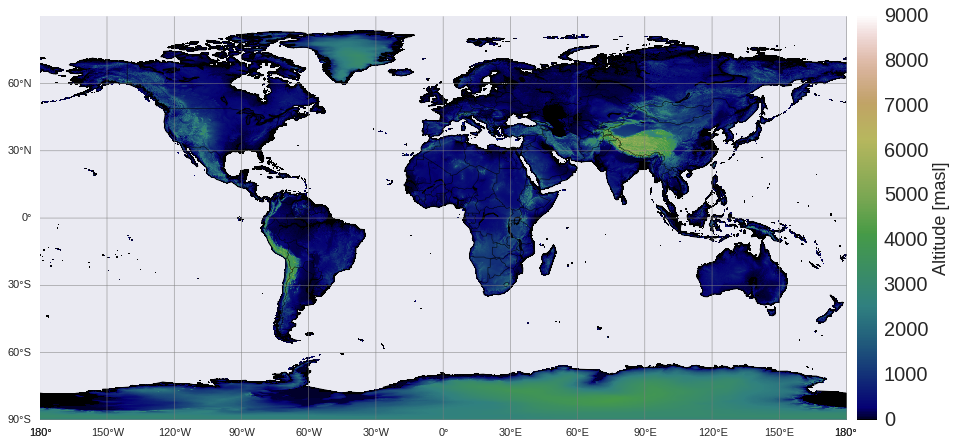

In [20]:
lllat    = 0
urlat    = 60
lllon    = -30
uprlon   = 130

xx, yy   = np.meshgrid(np.arange(-180,180,0.1),np.arange(-90,90,0.1))
fig      = plt.figure(1,figsize=(15,15))
ax       = fig.add_subplot(111)
#map     = Basemap(projection='cyl',llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=uprlon)
map      = Basemap(projection='cyl', lat_0=0, lon_0=0)
imm      = map.pcolormesh(xx,yy,topo_mask[::-1,:],cmap='gist_earth') # GnBU,Jet,coolwarm

imm.set_clim(vmin=0, vmax=9000)
cb        = add_colorbar(imm)
cb.set_label('Altitude [masl]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
#plt.title('Altitude',fontsize=20)
fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/Height.png',bbox_inches='tight',DPI=1000)
plt.show()

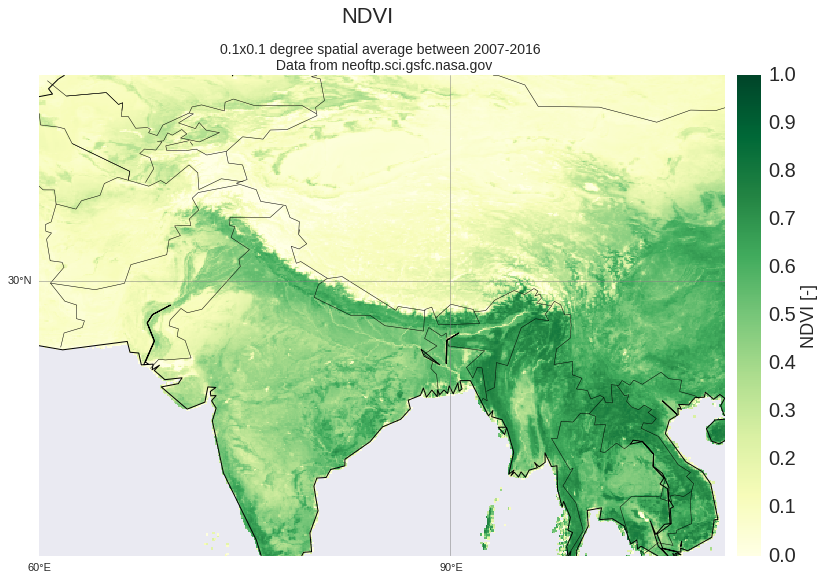

In [21]:
lllat    = 10
urlat    = 45
lllon    = 60
uprlon   = 110

xx, yy            = np.meshgrid(np.arange(-180,180,0.1),np.arange(-90,90,0.1))
map               = Basemap(projection='cyl',llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=uprlon)

fig               = plt.figure(1,figsize=(15,15))
ax                = fig.add_subplot(211)
imm               = map.pcolormesh(xx,yy,ndvi_2007_2016avg[::-1,:],cmap='YlGn') # GnBU,Jet,coolwarm
cb                = add_colorbar(imm)

imm.set_clim(vmin=0, vmax=1)
fig.suptitle('NDVI',x=0.47,y=1.01,fontsize=22)
ax.set_title('0.1x0.1 degree spatial average between 2007-2016 \n Data from neoftp.sci.gsfc.nasa.gov',fontsize=14)
cb.set_label('NDVI [-]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
#map.bluemarble()
fig.tight_layout()
plt.show()

In [9]:
topo           = pd.read_csv('SRTM_RAMP2_TOPO_2000-02-11_rgb_3600x1800.SS.CSV','r',delimiter=',')
topo           = topo.ix[:, topo.columns != 'lat/lon']
topo           = topo.set_index(np.arange(-90,90,0.1))
topo           = topo.mask(topo==99999)
ndvi_composite = pd.DataFrame(data=ndvi_2007_2016avg,columns=topo.columns)
ndvi_composite = ndvi_composite.set_index(topo.index)
print type(topo),type(ndvi_composite)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
plot   = np.ma.masked_invalid(np.array(ndvi_composite[(topo<2000) & (topo>1000) & (ndvi_composite<0.2)]))
plott  = np.ma.masked_invalid(np.array(ndvi_composite[(topo<2000) & (topo>1000) & (ndvi_composite>0.2)]))

plot2  = np.ma.masked_invalid(np.array(ndvi_composite[(topo<3000) & (topo>2000) & (ndvi_composite<0.2)]))
plot22 = np.ma.masked_invalid(np.array(ndvi_composite[(topo<3000) & (topo>2000) & (ndvi_composite>0.2)]))

plot3  = np.ma.masked_invalid(np.array(ndvi_composite[(topo<4000) & (topo>3000) & (ndvi_composite<0.2)]))
plot33 = np.ma.masked_invalid(np.array(ndvi_composite[(topo<4000) & (topo>3000) & (ndvi_composite>0.2)]))

plot4  = np.ma.masked_invalid(np.array(ndvi_composite[(topo<5000) & (topo>4000) & (ndvi_composite<0.2)]))
plot44 = np.ma.masked_invalid(np.array(ndvi_composite[(topo<5000) & (topo>4000) & (ndvi_composite>0.2)]))

plot5  = np.ma.masked_invalid(np.array(ndvi_composite[(topo<6000) & (topo>5000) & (ndvi_composite<0.2)]))
plot55 = np.ma.masked_invalid(np.array(ndvi_composite[(topo<6000) & (topo>5000) & (ndvi_composite>0.2)]))

plot6  = np.ma.masked_invalid(np.array(ndvi_composite[(topo<7000) & (topo>6000) & (ndvi_composite<0.2)]))
plot66 = np.ma.masked_invalid(np.array(ndvi_composite[(topo<7000) & (topo>6000) & (ndvi_composite>0.2)]))

In [10]:
plot   = np.ma.masked_invalid(np.array(ndvi_composite[(topo<7000) & (topo>1000) & (ndvi_composite>0.4)]))
#plott  = np.ma.masked_invalid(np.array(ndvi_composite[(topo<2000) & (topo>1000) & (ndvi_composite>0.2)]))

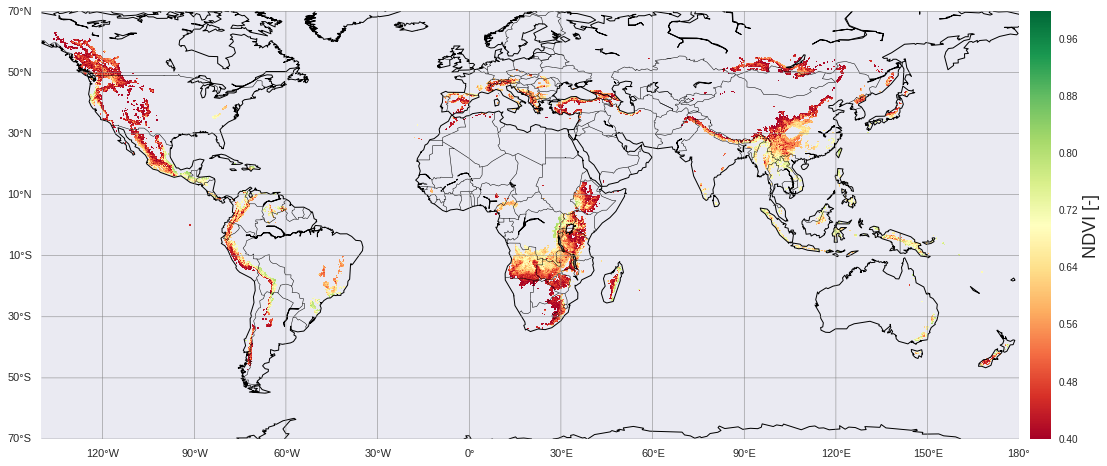

In [21]:
plot     = np.ma.masked_invalid(np.array(ndvi_composite[(topo<7000) & (topo>1000) & (ndvi_composite>0.4)]))
lllat    = -70
urlat    = 70
lllon    = -140
uprlon   = 180

#plot              = np.ma.masked_invalid(np.array(ndvi_composite[topo>2000]))
xx, yy            = np.meshgrid(np.arange(-180,180,0.1),np.arange(-90,90,0.1))
map               = Basemap(projection='cyl',llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=uprlon)
#map               = Basemap(projection='cyl', lat_0=0, lon_0=0)
fig               = plt.figure(1,figsize=(15,15))
ax                = fig.add_subplot(111)
imm               = map.pcolormesh(xx,yy,plot[::-1,:],cmap='RdYlGn') # GnBU,Jet,coolwarm
cb                = add_colorbar(imm)
imm.set_clim(vmin=0.4, vmax=1)
#fig.suptitle('LocatAs it was mentioned previously, ions with NDVI<0.1 and Altitudes above 2000',x=0.47,y=0.783,fontsize=22)
#ax.set_title('Spatial Resolution 0.1x0.1 degree, NDVI is averaged over 2007-2016 \n Data from neoftp.sci.gsfc.nasa.gov',fontsize=14)
cb.set_label('NDVI [-]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,20),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
#map.bluemarble()
fig.tight_layout()
fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/high_fs.png',bbox_inches='tight',DPI=1000)
plt.show()


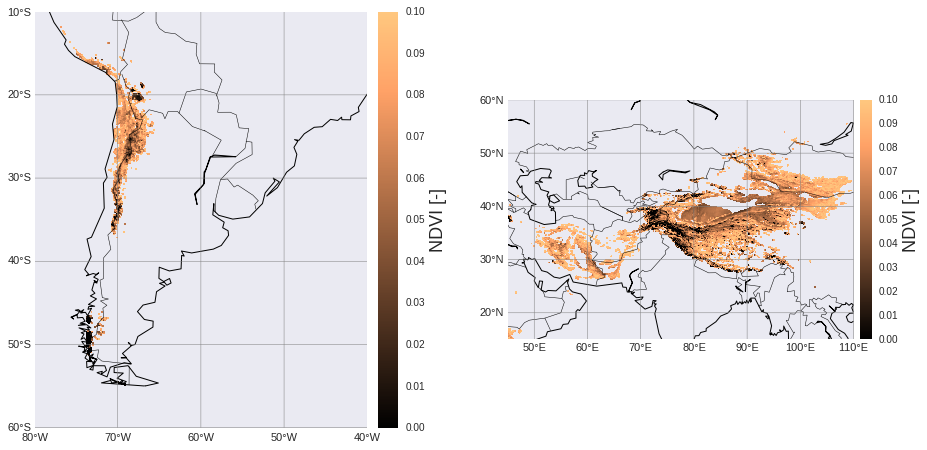

In [34]:
plot   = np.ma.masked_invalid(np.array(ndvi_composite[(topo>1000) & (ndvi_composite<0.1)]))

lllat    = -60
urlat    = -10
lllon    = -80
uprlon   = -40


#plot              = np.ma.masked_invalid(np.array(ndvi_composite[topo>2000]))
xx, yy            = np.meshgrid(np.arange(-180,180,0.1),np.arange(-90,90,0.1))
map               = Basemap(projection='cyl',llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=uprlon)
#map               = Basemap(projection='cyl', lat_0=0, lon_0=0)
fig               = plt.figure(1,figsize=(15,15))
ax                = fig.add_subplot(121)
imm               = map.pcolormesh(xx,yy,plot[::-1,:],cmap='copper') # GnBU,Jet,coolwarm
cb                = add_colorbar(imm)
imm.set_clim(vmin=0, vmax=0.1)
#fig.suptitle('Locations with NDVI<0.1 and Altitudes above 2000',x=0.47,y=0.783,fontsize=22)
#ax.set_title('Spatial Resolution 0.1x0.1 degree, NDVI is averaged over 2007-2016 \n Data from neoftp.sci.gsfc.nasa.gov',fontsize=14)
cb.set_label('NDVI [-]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,10),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,10),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)


lllat    = 15
urlat    = 60
lllon    = 45
uprlon   = 110

xx, yy            = np.meshgrid(np.arange(-180,180,0.1),np.arange(-90,90,0.1))#
map               = Basemap(projection='cyl',llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=uprlon)
#map               = Basemap(projection='cyl', lat_0=0, lon_0=0)
ax                = fig.add_subplot(122)
imm               = map.pcolormesh(xx,yy,plot[::-1,:],cmap='copper') # GnBU,Jet,coolwarm
cb                = add_colorbar(imm)
imm.set_clim(vmin=0, vmax=0.1)
cb.set_label('NDVI [-]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,10),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,10),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)

fig.subplots_adjust(wspace=0.3)
#fig.tight_layout()
fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/NDVI_Height_zoomed.png',bbox_inches='tight',DPI=1000)
plt.show()


In [25]:
plot        = np.ma.masked_invalid(np.array(ndvi_composite[(ndvi_composite>0.4)]))
topo_ndvi   = np.ma.masked_where(np.ma.getmask(plot),topo)
#new_x = np.ma.masked_where(np.ma.getmask(m), x)

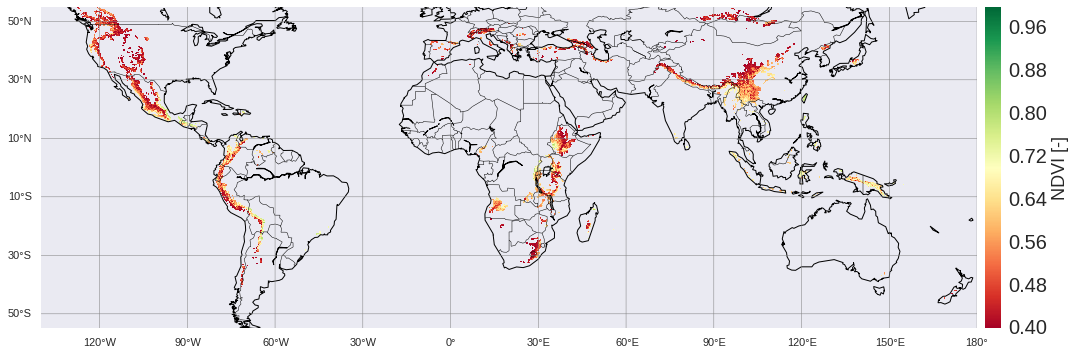

In [23]:
#gome2a       = np.ma.masked_where(seamask==0,fs_g2a_v2)
plot     = np.ma.masked_invalid(np.array(ndvi_composite[(topo<5000) & (topo>1500) & (ndvi_composite>0.4)]))

lllat    = -55
urlat    = 55
lllon    = -140
uprlon   = 180

#plot              = np.ma.masked_invalid(np.array(ndvi_composite[topo>2000]))
xx, yy            = np.meshgrid(np.arange(-180,180,0.1),np.arange(-90,90,0.1))
map               = Basemap(projection='cyl',llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=uprlon)
#map               = Basemap(projection='cyl', lat_0=0, lon_0=0)
fig               = plt.figure(1,figsize=(15,15))
ax                = fig.add_subplot(111)
imm               = map.pcolormesh(xx,yy,plot[::-1,:],cmap='RdYlGn') # GnBU,Jet,coolwarm
cb                = add_colorbar(imm)
imm.set_clim(vmin=0.4, vmax=1)
#fig.suptitle('LocatAs it was mentioned previously, ions with NDVI<0.1 and Altitudes above 2000',x=0.47,y=0.783,fontsize=22)
#ax.set_title('Spatial Resolution 0.1x0.1 degree, NDVI is averaged over 2007-2016 \n Data from neoftp.sci.gsfc.nasa.gov',fontsize=14)
cb.set_label('NDVI [-]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,20),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
#map.bluemarble()
fig.tight_layout()
fig.savefig('/usr/people/botiabo/high_fs.png',bbox_inches='tight',DPI=1000)
plt.show()

In [28]:
topo_ndvi_f = topo_ndvi.flatten()
print topo_ndvi_f.shape
eta = pd.DataFrame()
eta['Alti'] = topo_ndvi_f
alti_only_n = eta.dropna(how='any')
print alti_only_n.shape

(6480000,)
(2229411, 1)


In [10]:
from __future__ import division
def pressure_height(p):
    y = -((((p*100)/101325)**(1/5.25588) - 1) / (2.25577 * 10**-5))
    return(y)

713 713 <type 'list'>


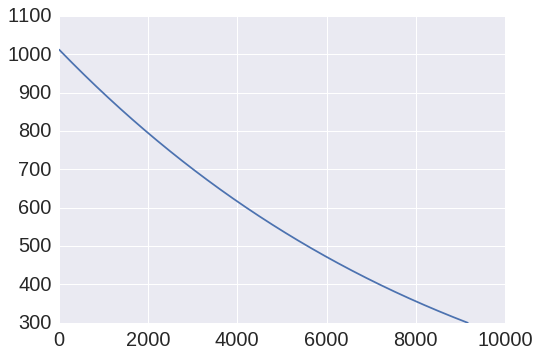

In [11]:
heights = []
for i in range(300,1013):
    heights.append(pressure_height(i))
plt.plot(heights,range(300,1013),)
print len(heights), len(range(300,1013)),type(heights)
altitude_prs = pd.DataFrame()
altitude_prs['Pres'] = range(300,1013)
altitude_prs['H'] = heights

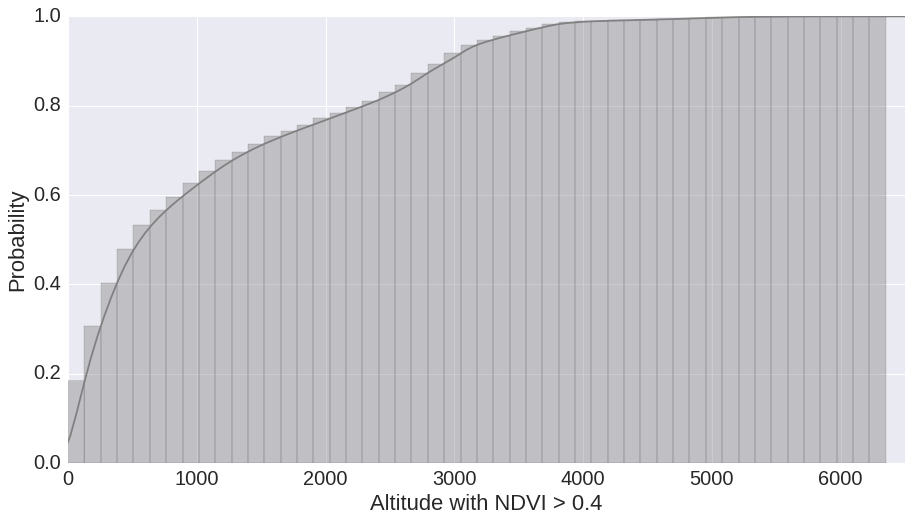

In [30]:
fig=plt.figure(1,figsize=(15,8))
sns.set(font_scale=2)
ax = sns.distplot(alti_only_n['Alti'],hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True),color='grey')
ax.set_xlabel('Altitude with NDVI > 0.4')
ax.set_ylabel('Probability')

plt.xlim(0,6500)
fig.savefig('/usr/people/botiabo/PDF_Veg')
plt.show()


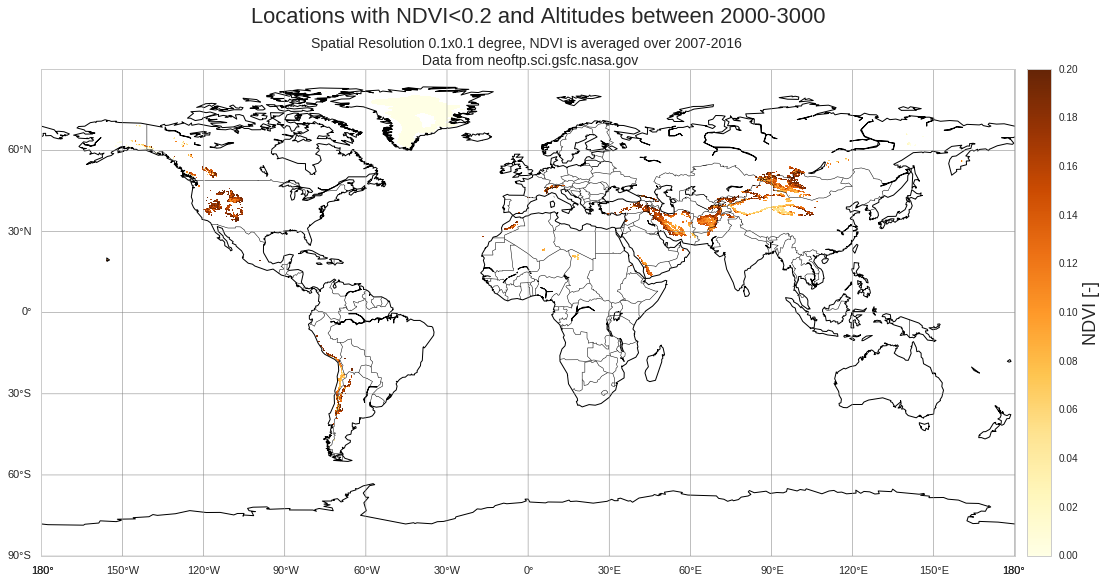

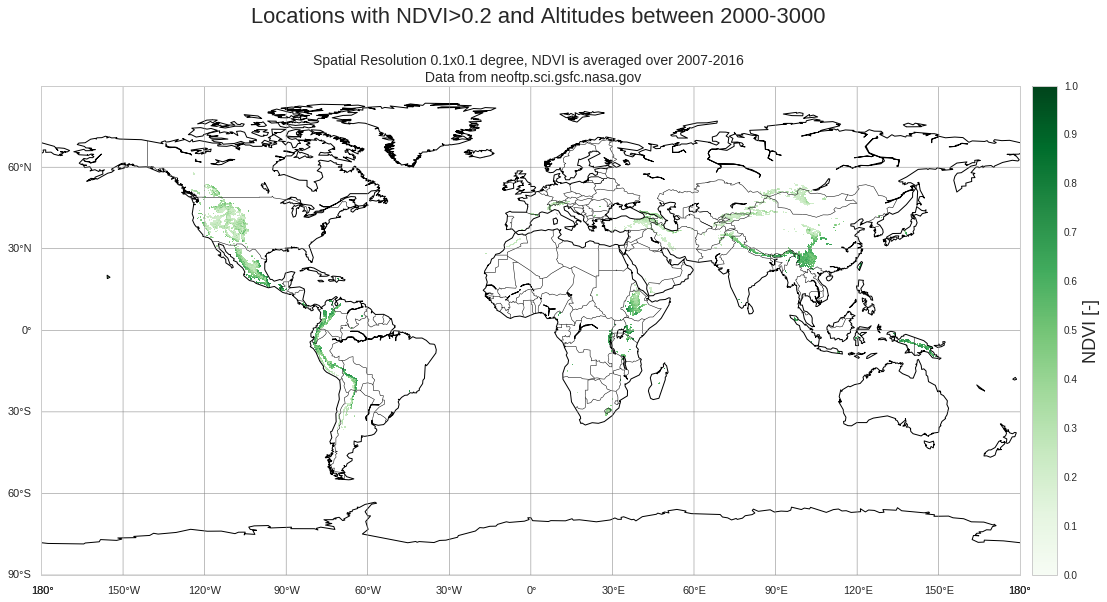

In [271]:
#plot              = np.ma.masked_invalid(np.array(ndvi_composite[topo>2000]))
xx, yy            = np.meshgrid(np.arange(-180,180,0.1),np.arange(-90,90,0.1))
map               = Basemap(projection='cyl', lat_0=0, lon_0=0)
fig               = plt.figure(1,figsize=(15,15))
ax                = fig.add_subplot(111)
imm               = map.pcolormesh(xx,yy,plot2[::-1,:],cmap='YlOrBr') # GnBU,Jet,coolwarm
cb                = add_colorbar(imm)
imm.set_clim(vmin=0, vmax=0.2)
fig.suptitle('Locations with NDVI<0.2 and Altitudes between 2000-3000',x=0.47,y=0.783,fontsize=22)
ax.set_title('Spatial Resolution 0.1x0.1 degree, NDVI is averaged over 2007-2016 \n Data from neoftp.sci.gsfc.nasa.gov',fontsize=14)
cb.set_label('NDVI [-]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
#map.bluemarble()
fig.tight_layout()
plt.show()

lllat             = 0
urlat             = 60
lllon             = 30
uprlon            = 150

fig               = plt.figure(1,figsize=(15,15))
ax                = fig.add_subplot(111)
xx, yy            = np.meshgrid(np.arange(-180,180,0.1),np.arange(-90,90,0.1))
map               = Basemap(projection='cyl', lat_0=0, lon_0=0)
#map               = Basemap(projection='cyl',llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=uprlon)
imm               = map.pcolormesh(xx,yy,plot22[::-1,:],cmap='Greens')
cb                = add_colorbar(imm)
imm.set_clim(vmin=0, vmax=1)
fig.suptitle('Locations with NDVI>0.2 and Altitudes between 2000-3000',x=0.47,y=.8,fontsize=22)
ax.set_title('Spatial Resolution 0.1x0.1 degree, NDVI is averaged over 2007-2016 \n Data from neoftp.sci.gsfc.nasa.gov',fontsize=14)
cb.set_label('NDVI [-]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
#map.bluemarble()
fig.tight_layout()
plt.show()

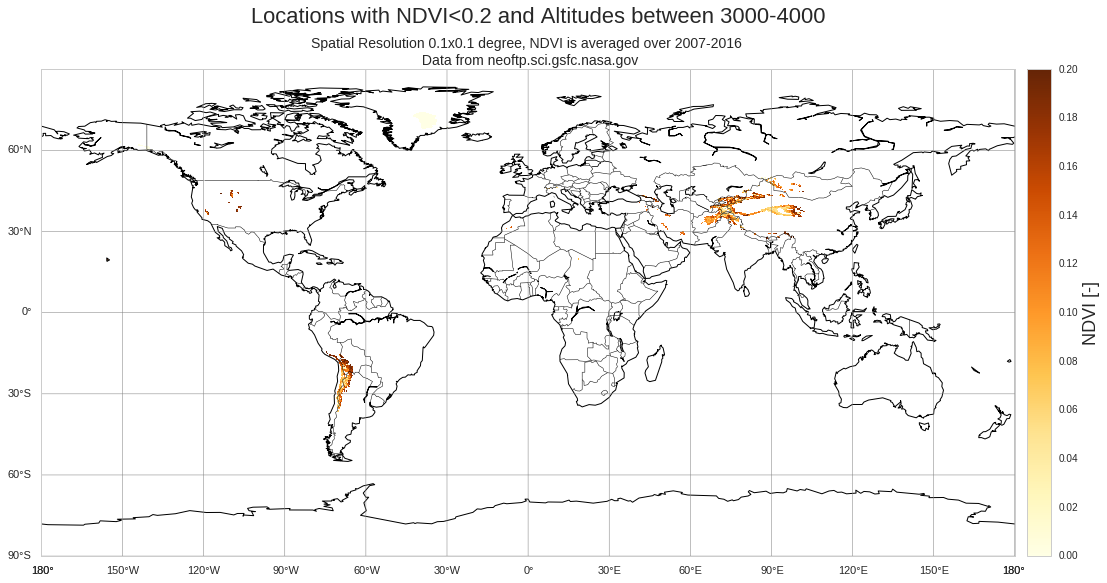

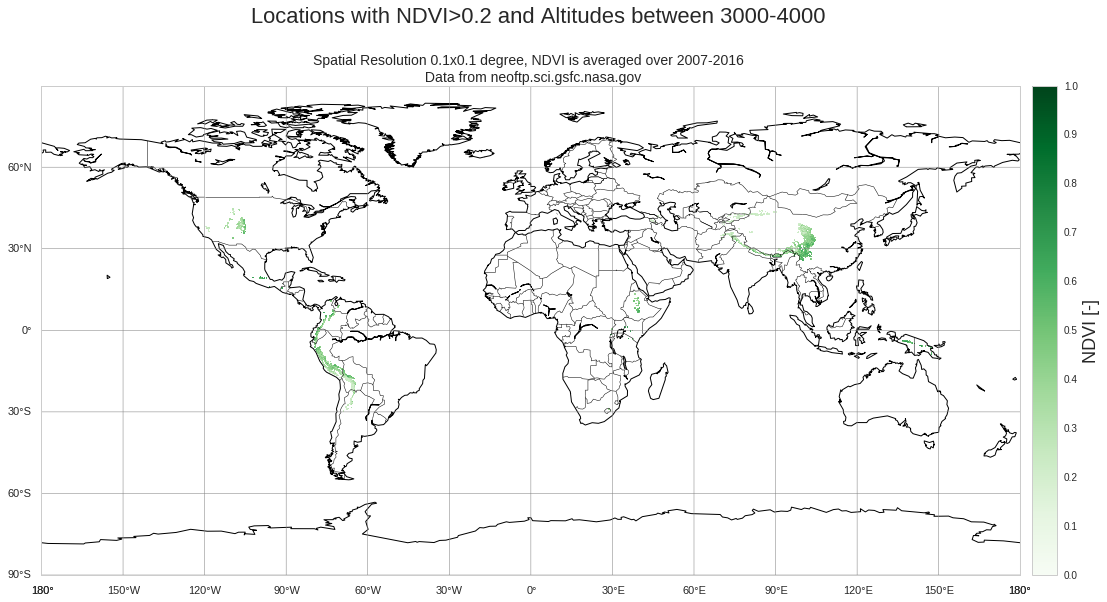

In [272]:
#plot              = np.ma.masked_invalid(np.array(ndvi_composite[topo>2000]))
xx, yy            = np.meshgrid(np.arange(-180,180,0.1),np.arange(-90,90,0.1))
map               = Basemap(projection='cyl', lat_0=0, lon_0=0)
fig               = plt.figure(1,figsize=(15,15))
ax                = fig.add_subplot(111)
imm               = map.pcolormesh(xx,yy,plot3[::-1,:],cmap='YlOrBr') # GnBU,Jet,coolwarm
cb                = add_colorbar(imm)
imm.set_clim(vmin=0, vmax=0.2)
fig.suptitle('Locations with NDVI<0.2 and Altitudes between 3000-4000',x=0.47,y=0.783,fontsize=22)
ax.set_title('Spatial Resolution 0.1x0.1 degree, NDVI is averaged over 2007-2016 \n Data from neoftp.sci.gsfc.nasa.gov',fontsize=14)
cb.set_label('NDVI [-]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
#map.bluemarble()
fig.tight_layout()
plt.show()

lllat             = 0
urlat             = 60
lllon             = 30
uprlon            = 150

fig               = plt.figure(1,figsize=(15,15))
ax                = fig.add_subplot(111)
xx, yy            = np.meshgrid(np.arange(-180,180,0.1),np.arange(-90,90,0.1))
map               = Basemap(projection='cyl', lat_0=0, lon_0=0)
#map               = Basemap(projection='cyl',llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=uprlon)
imm               = map.pcolormesh(xx,yy,plot33[::-1,:],cmap='Greens')
cb                = add_colorbar(imm)
imm.set_clim(vmin=0, vmax=1)
fig.suptitle('Locations with NDVI>0.2 and Altitudes between 3000-4000',x=0.47,y=.8,fontsize=22)
ax.set_title('Spatial Resolution 0.1x0.1 degree, NDVI is averaged over 2007-2016 \n Data from neoftp.sci.gsfc.nasa.gov',fontsize=14)
cb.set_label('NDVI [-]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-90,90,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
map.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
#map.bluemarble()
fig.tight_layout()
plt.show()

# If I have time I can include the landcover criteria

In [ ]:
'''
xx, yy = np.meshgrid(np.arange(-180,180,0.1),np.arange(-90,90,0.1))
m = Basemap(projection='cyl', resolution='l', llcrnrlat=-90, urcrnrlat = 90, llcrnrlon=-180, urcrnrlon = 180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 45.), labels=[0, 0, 0, 1])
x, y = m(xx, yy)
m.pcolormesh(x, y, data)'''


#data3D.dimensions()
#imshow(data3D)
#data = data3D[11,:,:]
# Read geolocation dataset.
#lat = hdf.select('Latitude')
#latitude = lat[:,:]
#lon = hdf.select('Longitude')
#longitude = lon[:,:]

In [16]:
from __future__ import division
def pressure_height(p):
    y = -((((p*100)/101325)**(1/5.25588) - 1) / (2.25577 * 10**-5))
    return(y)

In [40]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn
from pylab import plot, title, show , legend


p = range(300,1013)
#Linear regressison -polyfit - polyfit can be used other orders polys
(ar,br)=polyfit(heights,p,1)


In [45]:
x = 6000
y = ar*x + br
print y

485.938365744
